# Pillowを使った画像の加工

## サムネイル化

In [1]:
from PIL import Image

with Image.open("data/sample.jpg") as im:
    im.thumbnail((128, 128))
    im.save("data/thumb-test.jpg")

In [2]:
# Jupyter Notebookで実行する場合にNotebook内に画像を表示する設定
from PIL import ImageShow

ImageShow.register(ImageShow.IPythonViewer, order=0)

(128, 85)


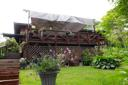

In [3]:
with Image.open("data/thumb-test.jpg") as thumb:
    print(thumb.size)
    thumb.show()

## クロップ（切り取り）

In [4]:
def calc_cropping_box(image):
    """
    クロップする四隅の座標を計算する関数
    """
    x, y = image.size
    print(f"{x=}, {y=}")
    if x > y:  # 幅が大きい（横長）場合の処理：高さが正方形の1辺の長さ
        left = (x - y) // 2
        upper = 0
        right = left + y
        lower = y
    else:  # 高さが大きい（縦長）場合の処理：幅が正方形の1辺の長さ
        left = 0
        upper = (y - x) // 2
        right = x
        lower = upper + x
    box = (
        left,
        upper,
        right,
        lower,
    )  # 切り取る四隅の座標
    print(f"{box=}")
    return box

In [5]:
with Image.open("data/sample.jpg") as im:
    box = calc_cropping_box(im)
    cropped = im.crop(box)
    cropped.save("data/cropped-test.jpg")

x=800, y=533
box=(133, 0, 666, 533)


x=533, y=533


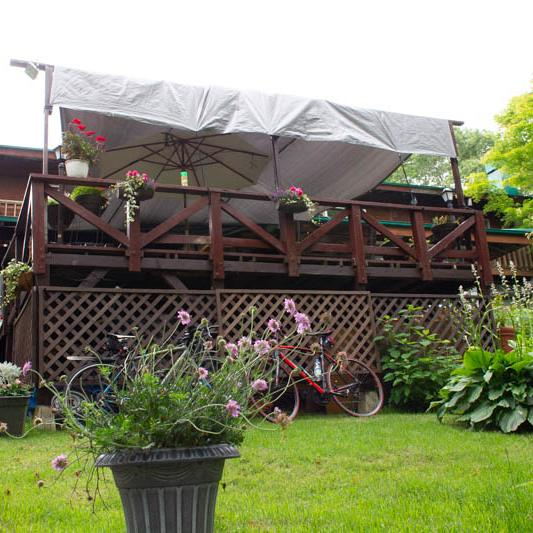

In [6]:
with Image.open("data/cropped-test.jpg") as cropped:
    x, y = cropped.size
    print(f"{x=}, {y=}")
    cropped.show()

## グレースケール（モノクロ）化

In [7]:
with Image.open("data/sample.jpg") as im:
    im_gray = im.convert("L")
    im_gray.save("data/gray-test.jpg")

## 複数の画像をまとめて処理する方法

In [8]:
import pathlib

current = pathlib.Path(".")

In [9]:
for filename in current.glob("data/sample*.jpg"):
    stem = filename.stem  # 拡張子を含まないファイル名
    suffix = filename.suffix  # 拡張子
    with Image.open(filename) as im:
        print(filename)
        # クロップ
        box = calc_cropping_box(im)
        cropped = im.crop(box)
        # サムネイル化
        cropped.thumbnail((128, 128))
        cropped.save(current / f"data/cropped-{stem}{suffix}")
        # グレースケール化
        gray = cropped.convert("L")
        gray.save(current / f"data/cropped-gray-{stem}{suffix}")

data/sample.jpg
x=800, y=533
box=(133, 0, 666, 533)
data/sample-v.jpg
x=3024, y=4032
box=(0, 504, 3024, 3528)


data/cropped-sample.jpg


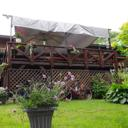

data/cropped-sample-v.jpg


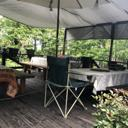

In [10]:
for filename in current.glob("data/cropped-sample*.jpg"):
    with Image.open(filename) as im:
        print(filename)
        im.show()

data/cropped-gray-sample.jpg


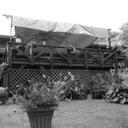

data/cropped-gray-sample-v.jpg


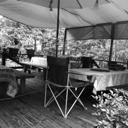

In [11]:
for filename in current.glob("data/cropped-gray-sample*.jpg"):
    with Image.open(filename) as im:
        print(filename)
        im.show()